<a href="https://colab.research.google.com/github/Prithwi13/NBA/blob/main/ASDS_5302_Final_Project_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install xgboost
%pip install nba_api

# Import NBA Statistic from NBA-API

In [9]:
from nba_api.stats import endpoints

In [10]:
# List all of the endpoints
all_endpoints = dir(endpoints)
all_endpoints

['AllTimeLeadersGrids',
 'AssistLeaders',
 'AssistTracker',
 'BoxScoreAdvancedV2',
 'BoxScoreAdvancedV3',
 'BoxScoreDefensiveV2',
 'BoxScoreFourFactorsV2',
 'BoxScoreFourFactorsV3',
 'BoxScoreHustleV2',
 'BoxScoreMatchupsV3',
 'BoxScoreMiscV2',
 'BoxScoreMiscV3',
 'BoxScorePlayerTrackV2',
 'BoxScorePlayerTrackV3',
 'BoxScoreScoringV2',
 'BoxScoreScoringV3',
 'BoxScoreSummaryV2',
 'BoxScoreTraditionalV2',
 'BoxScoreTraditionalV3',
 'BoxScoreUsageV2',
 'BoxScoreUsageV3',
 'CommonAllPlayers',
 'CommonPlayerInfo',
 'CommonPlayoffSeries',
 'CommonTeamRoster',
 'CommonTeamYears',
 'CumeStatsPlayer',
 'CumeStatsPlayerGames',
 'CumeStatsTeam',
 'CumeStatsTeamGames',
 'DefenseHub',
 'DraftBoard',
 'DraftCombineDrillResults',
 'DraftCombineNonStationaryShooting',
 'DraftCombinePlayerAnthro',
 'DraftCombineSpotShooting',
 'DraftCombineStats',
 'DraftHistory',
 'FantasyWidget',
 'FranchiseHistory',
 'FranchiseLeaders',
 'FranchisePlayers',
 'GLAlumBoxScoreSimilarityScore',
 'GameRotation',
 'HomeP

### Data we choose to used for predictions:
* leaguestandings - Standings
* leaguedashteamstats - Team Statistics
* leaguedashplayerstats - Player Statistics

In [11]:
from nba_api.stats.endpoints import leaguedashteamstats, leaguedashplayerstats, leaguestandings

# Leagues Standings:
*** league standing is the ranked table showing how every team in a league compares based on their performance so far in a season.

It contains(shape):-
30 rows → One row per NBA team (there are 30 teams in the league)
81 columns → 81 different pieces of data (fields) for each team
Those 81 columns generally fall into a few categories:

1. Identifiers & Context:
LeagueID, SeasonID – Which league and season these stats belong to.
TeamID, TeamCity, TeamName – Unique team identifier and its city/name.
Conference, Division – Which conference (East/West) and division the team plays in.

2. Overall Standings & Seeding:
WINS, LOSSES, WinPCT – Total wins, losses, and win‑percentage (wins ÷ games played).
LeagueRank, ConferenceRecord, DivisionRecord – Your rank overall (rarely used), plus your conference‑ and division‑level won/loss split.
LeagueRank vs. ConferenceRank vs. DivisionRank – Position in the overall league, within your conference, and within your division.
PlayoffRank – Seeding position for the playoffs (1–8 in each conference).
ClinchIndicator – “Y” if the team has already clinched a playoff spot; otherwise blank.

3. Games‑Back & Seeding Margin:
GB (not shown above but implicit) – “Games Back” from first place (calculated).
ConferenceGamesBack, DivisionGamesBack – How many games you trail the top seed in your conference/division.

4. Home/Road & Recent Splits:
HOME, ROAD – Overall record at home vs. on the road (e.g. 25‑16).
L10, Last10Home, Last10Road – Record in the last 10 total games, and last 10 home or road games.
OT – Record in overtime games.
ThreePTSOrLess, TenPTSOrMore – Records in games decided by 3 points or fewer, or by 10 points or more.

5. Streaks:
LongHomeStreak, LongRoadStreak – Longest consecutive home/road winning or losing streaks (integer).
LongWinStreak, LongLossStreak – Season‑high winning and losing streaks.
CurrentHomeStreak, CurrentRoadStreak, CurrentStreak – How many straight home wins/losses, road wins/losses, or overall wins/losses you’re on now.
str... columns (e.g. strCurrentStreak) give a human‑readable version like "W 4" or "L 2".

6. Situational Records:
AheadAtHalf / BehindAtHalf / TiedAtHalf – Your record when leading, trailing, or tied at halftime.
AheadAtThird / BehindAtThird / TiedAtThird – Same for after the third quarter.
Score100PTS / OppScore100PTS – Your record in games you scored 100+ points, and ones where your opponent did.
OppOver500, LeadInFGPCT, LeadInReb, FewerTurnovers – Records when your opponent’s record was over .500, when you led in FG% or rebounding, or when you committed fewer turnovers.

7. Division & Conference Matchups:
vsEast, vsAtlantic, vsCentral, vsSoutheast, vsWest, vsNorthwest, vsPacific, vsSouthwest
Your record against each conference (East/West) or division within your conference (Atlantic, Central, Southeast, etc.).

8. Month‑by‑Month Splits:
Jan, Feb, Mar, Apr, Oct, Nov, Dec – Your record in each calendar month.
May – Sep – All zeroes this season (no games scheduled in those months for the regular season).

9. All‑Star Break Splits:
PreAS, PostAS – Your record before and after the All‑Star break.

In [12]:
df_standings = leaguestandings.LeagueStandings(season='2023-24').get_data_frames()[0]
df_standings.head()

,LeagueID,SeasonID,TeamID,TeamCity,TeamName,Conference,ConferenceRecord,PlayoffRank,ClinchIndicator,Division,...,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,PreAS,PostAS
0,00,22023,1610612738,Boston,Celtics,East,41-11,1,- e,Atlantic,...,None,None,None,None,None,3-0,11-4,12-2,43-12,21-6
1,00,22023,1610612760,Oklahoma City,Thunder,West,36-16,1,- w,Northwest,...,None,None,None,None,None,3-1,9-5,10-3,37-17,20-8
2,00,22023,1610612743,Denver,Nuggets,West,33-19,2,- x,Northwest,...,None,None,None,None,None,4-0,9-6,10-5,36-19,21-6
3,00,22023,1610612752,New York,Knicks,East,35-17,2,- x,Atlantic,...,None,None,None,None,None,2-2,9-5,6-8,33-22,17-10
4,00,22023,1610612750,Minnesota,Timberwolves,West,37-15,3,- x,Northwest,...,None,None,None,None,None,1-2,13-2,10-3,39-16,17-10


In [13]:
df_standings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 81 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   LeagueID                 30 non-null     object 
 1   SeasonID                 30 non-null     object 
 2   TeamID                   30 non-null     int64  
 3   TeamCity                 30 non-null     object 
 4   TeamName                 30 non-null     object 
 5   Conference               30 non-null     object 
 6   ConferenceRecord         30 non-null     object 
 7   PlayoffRank              30 non-null     int64  
 8   ClinchIndicator          30 non-null     object 
 9   Division                 30 non-null     object 
 10  DivisionRecord           30 non-null     object 
 11  DivisionRank             30 non-null     int64  
 12  WINS                     30 non-null     int64  
 13  LOSSES                   30 non-null     int64  
 14  WinPCT                   30 

In [14]:
df_standings.shape # 30 rows means 30 teams

(30, 81)

In [15]:
df_standings.columns

Index(['LeagueID', 'SeasonID', 'TeamID', 'TeamCity', 'TeamName', 'Conference',
       'ConferenceRecord', 'PlayoffRank', 'ClinchIndicator', 'Division',
       'DivisionRecord', 'DivisionRank', 'WINS', 'LOSSES', 'WinPCT',
       'LeagueRank', 'Record', 'HOME', 'ROAD', 'L10', 'Last10Home',
       'Last10Road', 'OT', 'ThreePTSOrLess', 'TenPTSOrMore', 'LongHomeStreak',
       'strLongHomeStreak', 'LongRoadStreak', 'strLongRoadStreak',
       'LongWinStreak', 'LongLossStreak', 'CurrentHomeStreak',
       'strCurrentHomeStreak', 'CurrentRoadStreak', 'strCurrentRoadStreak',
       'CurrentStreak', 'strCurrentStreak', 'ConferenceGamesBack',
       'DivisionGamesBack', 'ClinchedConferenceTitle', 'ClinchedDivisionTitle',
       'ClinchedPlayoffBirth', 'EliminatedConference', 'EliminatedDivision',
       'AheadAtHalf', 'BehindAtHalf', 'TiedAtHalf', 'AheadAtThird',
       'BehindAtThird', 'TiedAtThird', 'Score100PTS', 'OppScore100PTS',
       'OppOver500', 'LeadInFGPCT', 'LeadInReb', 'FewerTurnove

**Player Statistics:**

player_stats DataFrame explains individual player statistics, it comes in at 569 rows × 66 columns—that is:

569 rows → one for each player who logged minutes in the 2024‑25 season.
66 columns → a mix of raw statistical measures and each measure’s corresponding league‑wide rank

1.Player & Team Identification:
PLAYER_ID, PLAYER_NAME, NICKNAME – Unique player ID, full name, and common nickname.
TEAM_ID, TEAM_ABBREVIATION – Team’s numeric ID and three‑letter code.
AGE – Player’s age (in years).

2.Games & Outcomes:
GP, W, L – Games played, wins, and losses.
W_PCT – Winning percentage (wins ÷ games played).

3.Playing Time
MIN – Average minutes played per game.


4.Shooting & Scoring:
FGM, FGA, FG_PCT – Field goals made, attempted, and success rate.
FG3M, FG3A, FG3_PCT – Three‑pointers made, attempted, and success rate.
FTM, FTA, FT_PCT – Free‑throws made, attempted, and success rate.
PTS – Points scored per game.

5.Rebounding:
OREB, DREB, REB – Offensive rebounds, defensive rebounds, and total rebounds per game.

6.Playmaking & Ball‑Handling:
AST – Assists per game.
TOV – Turnovers per game.

7.Defense & Miscellaneous Counting Stats:
STL – Steals per game.
BLK – Blocks per game.
BLKA – Shots blocked against per game.
PF, PFD – Personal fouls committed and drawn per game.
PLUS_MINUS – Net point differential while on court.
DD2, TD3 – Total double‑doubles and triple‑doubles.
NBA_FANTASY_PTS, WNBA_FANTASY_PTS – Composite fantasy‑league scoring.

8.Efficiency & Impact Metrics:
TS_PCT – True‑shooting percentage (accounts for 2/3/FT efficiency).
EFG_PCT – Effective field‑goal percentage (3s weighted as 1.5×).
PACE – Team possessions per 48 min with the player on court.
PIE – Player Impact Estimate (share of game “impact”).

9.League‑Wide Ranks:
For each raw stat above, there’s a corresponding _RANK column (e.g., PTS_RANK, REB_RANK, AST_RANK, …, WNBA_FANTASY_PTS_RANK) showing the player’s position among all 569 players in that category.





In [16]:
player_stats = leaguedashplayerstats.LeagueDashPlayerStats(season='2023-24').get_data_frames()[0]
player_stats.head()

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK
0,1630639,A.J. Lawson,A.J.,1610612742,DAL,23.0,42,27,15,0.643,...,428,211,148,415,385,192,400,257,38,405
1,1631260,AJ Green,AJ,1610612749,MIL,24.0,56,35,21,0.625,...,410,121,223,375,313,145,369,257,38,343
2,1631100,AJ Griffin,AJ,1610612737,ATL,20.0,20,8,12,0.400,...,451,121,77,519,450,396,480,257,38,469
3,203932,Aaron Gordon,Aaron,1610612743,DEN,28.0,73,49,24,0.671,...,79,520,457,52,93,13,79,54,38,87
4,1628988,Aaron Holiday,Aaron,1610612745,HOU,27.0,78,39,39,0.500,...,370,335,419,238,216,123,243,257,38,233


In [17]:
player_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 66 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PLAYER_ID              572 non-null    int64  
 1   PLAYER_NAME            572 non-null    object 
 2   NICKNAME               572 non-null    object 
 3   TEAM_ID                572 non-null    int64  
 4   TEAM_ABBREVIATION      572 non-null    object 
 5   AGE                    572 non-null    float64
 6   GP                     572 non-null    int64  
 7   W                      572 non-null    int64  
 8   L                      572 non-null    int64  
 9   W_PCT                  572 non-null    float64
 10  MIN                    572 non-null    float64
 11  FGM                    572 non-null    int64  
 12  FGA                    572 non-null    int64  
 13  FG_PCT                 572 non-null    float64
 14  FG3M                   572 non-null    int64  
 15  FG3A  

In [18]:
player_stats.shape # Each rows are players in the leagues from all teams

(572, 66)

In [19]:
player_stats.columns

Index(['PLAYER_ID', 'PLAYER_NAME', 'NICKNAME', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'AGE', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M',
       'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST',
       'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS',
       'NBA_FANTASY_PTS', 'DD2', 'TD3', 'WNBA_FANTASY_PTS', 'GP_RANK',
       'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK',
       'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK',
       'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK',
       'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK',
       'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK',
       'DD2_RANK', 'TD3_RANK', 'WNBA_FANTASY_PTS_RANK'],
      dtype='object')

**Team Statistics**
It explains the per-game performance stats for each NBA team over a season, It includes:-

30 rows = Stats for 30 teams columns
54 columns = features/metrics recorded for each team. These include:

1.Team Identification
TEAM_ID, TEAM_NAME – Unique team ID and full team name.

2.Games & Results:
GP, W, L – Games played, wins, and losses.
W_PCT – Win percentage.

3.Playing Time:
MIN – Total minutes played per game.

4.Shooting:
FGM, FGA, FG_PCT – Field goals made, attempted, and shooting percentage.
FG3M, FG3A, FG3_PCT – Three‑pointers made, attempted, and shooting percentage.
FTM, FTA, FT_PCT – Free throws made, attempted, and free throw percentage.

5.Rebounding:
OREB, DREB, REB – Offensive, defensive, and total rebounds per game.

6.Playmaking & Turnovers:
AST – Assists per game.
TOV – Turnovers per game.

7.Defense & Fouls:
STL – Steals per game.
BLK – Blocks per game.
BLKA – Shots blocked against.
PF, PFD – Personal fouls committed and drawn.

8.Scoring & Impact:
PTS – Points scored per game.
PLUS_MINUS – Average point differential when the team is on the floor.

9.League‑Wide Rankings:
*_RANK – Rank of the team in each respective stat across all 30 teams
(e.g., W_RANK, FG_PCT_RANK, AST_RANK, PTS_RANK, etc.).


In [20]:
team_stats = leaguedashteamstats.LeagueDashTeamStats(season='2023-24').get_data_frames()[0]
team_stats.head()

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK
0,1610612737,Atlanta Hawks,82,36,46,0.439,3971.0,3529,7584,0.465,...,6,16,16,16,26,22,15,7,5,21
1,1610612738,Boston Celtics,82,64,18,0.780,3966.0,3601,7396,0.487,...,2,14,1,27,1,1,2,30,2,1
2,1610612751,Brooklyn Nets,82,32,50,0.390,3961.0,3334,7307,0.456,...,11,20,12,28,12,16,13,21,25,22
3,1610612766,Charlotte Hornets,82,21,61,0.256,3946.0,3281,7133,0.460,...,30,26,18,25,25,13,7,29,28,30
4,1610612741,Chicago Bulls,82,39,43,0.476,3996.0,3448,7339,0.470,...,14,23,3,9,18,14,17,14,22,20


In [21]:
team_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 54 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TEAM_ID          30 non-null     int64  
 1   TEAM_NAME        30 non-null     object 
 2   GP               30 non-null     int64  
 3   W                30 non-null     int64  
 4   L                30 non-null     int64  
 5   W_PCT            30 non-null     float64
 6   MIN              30 non-null     float64
 7   FGM              30 non-null     int64  
 8   FGA              30 non-null     int64  
 9   FG_PCT           30 non-null     float64
 10  FG3M             30 non-null     int64  
 11  FG3A             30 non-null     int64  
 12  FG3_PCT          30 non-null     float64
 13  FTM              30 non-null     int64  
 14  FTA              30 non-null     int64  
 15  FT_PCT           30 non-null     float64
 16  OREB             30 non-null     int64  
 17  DREB             3

In [22]:
team_stats.shape

(30, 54)

In [23]:
team_stats.describe()

,TEAM_ID,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,...,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK
count,3.000000e+01,30.0,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,1.610613e+09,82.0,41.000000,41.000000,0.50000,3958.333333,3457.966667,7290.000000,0.474300,1052.633333,...,15.466667,15.500000,15.400000,15.433333,15.400000,15.466667,15.500000,15.466667,15.500000,15.466667
std,8.803408e+00,0.0,13.411266,13.411266,0.16355,12.712561,141.896631,169.272276,0.016912,99.378928,...,8.850222,8.803408,8.814565,8.842231,8.892461,8.752274,8.803408,8.760150,8.803408,8.826814
min,1.610613e+09,82.0,14.000000,18.000000,0.17100,3941.000000,3145.000000,6964.000000,0.435000,903.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.610613e+09,82.0,31.250000,33.000000,0.38100,3947.250000,3383.500000,7168.000000,0.464250,989.750000,...,8.250000,8.250000,8.250000,8.250000,8.250000,8.250000,8.250000,8.250000,8.250000,8.250000
50%,1.610613e+09,82.0,46.500000,35.500000,0.56700,3961.000000,3457.000000,7315.500000,0.473500,1036.500000,...,15.500000,15.500000,15.500000,15.500000,15.000000,15.500000,15.500000,15.500000,15.500000,15.500000
75%,1.610613e+09,82.0,49.000000,50.750000,0.59800,3966.000000,3537.250000,7389.750000,0.486750,1089.750000,...,22.750000,22.750000,22.750000,22.750000,22.750000,22.750000,22.750000,22.750000,22.750000,22.750000
max,1.610613e+09,82.0,64.000000,68.000000,0.78000,3996.000000,3855.000000,7599.000000,0.507000,1351.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000


In [24]:
team_stats.columns

Index(['TEAM_ID', 'TEAM_NAME', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS',
       'PLUS_MINUS', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK',
       'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK',
       'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK',
       'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK',
       'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK'],
      dtype='object')

# Merge Data

In [25]:
### Player Statistics aggerated to team levels
player_agg = player_stats.groupby(['TEAM_ID']).agg({
    'PTS': 'mean', # Points
    'AST': 'mean', # Assist
    'REB': 'mean', # Rebound
    'FG_PCT': 'mean', # Field Goal Percentage
    'FG3_PCT': 'mean', # Three-Point Field Goals Made percentage
    'TOV': 'mean' # Turnover
}).reset_index()
player_agg

,TEAM_ID,PTS,AST,REB,FG_PCT,FG3_PCT,TOV
0,1610612737,537.055556,120.722222,202.611111,0.438111,0.301389,57.666667
1,1610612738,594.705882,133.647059,232.235294,0.492529,0.383882,56.470588
2,1610612739,526.833333,129.166667,203.222222,0.459111,0.329056,59.111111
3,1610612740,494.315789,115.368421,189.000000,0.394737,0.299789,53.157895
4,1610612741,511.444444,113.777778,199.611111,0.439278,0.279278,53.166667
5,1610612742,533.894737,112.947368,200.894737,0.485632,0.289053,53.842105
6,1610612743,554.000000,142.058824,214.294118,0.478529,0.332471,56.882353
7,1610612744,536.500000,133.444444,212.777778,0.461722,0.271500,62.444444
8,1610612745,551.470588,119.705882,219.235294,0.479588,0.303824,58.882353
9,1610612746,525.666667,115.777778,195.500000,0.466833,0.271611,55.666667


In [26]:
team_stats = team_stats[[
    'TEAM_ID',
    'TEAM_NAME',
    'W', # Win
    'L', # Lose
    'W_PCT', # Win Percentage
    'FG_PCT', # Field Goal Percentage
    'FG3M', # Three-Point Field Goals Made
    'FG3_PCT', # Three-Point Field Goals Made percentage
    'REB', # Rebound
    'AST', # Number of Assist
    'TOV', # Turnover
    'STL', # Steal
    'BLK', # Block
    'PLUS_MINUS' # difference in a team's score
]]
team_stats

,TEAM_ID,TEAM_NAME,W,L,W_PCT,FG_PCT,FG3M,FG3_PCT,REB,AST,TOV,STL,BLK,PLUS_MINUS
0,1610612737,Atlanta Hawks,36,46,0.439,0.465,1125,0.364,3663,2180,1110.0,615,369,-179.0
1,1610612738,Boston Celtics,64,18,0.780,0.487,1351,0.388,3799,2207,979.0,557,538,930.0
2,1610612751,Brooklyn Nets,32,50,0.390,0.456,1089,0.362,3613,2102,1076.0,556,424,-237.0
3,1610612766,Charlotte Hornets,21,61,0.256,0.460,989,0.355,3303,2033,1129.0,562,371,-840.0
4,1610612741,Chicago Bulls,39,43,0.476,0.470,941,0.358,3593,2048,1004.0,638,394,-118.0
5,1610612739,Cleveland Cavaliers,48,34,0.585,0.479,1108,0.367,3549,2299,1112.0,605,380,198.0
6,1610612742,Dallas Mavericks,50,32,0.610,0.481,1197,0.369,3521,2106,1027.0,563,406,181.0
7,1610612743,Denver Nuggets,57,25,0.695,0.496,958,0.374,3643,2415,1036.0,585,456,431.0
8,1610612765,Detroit Pistons,14,68,0.171,0.463,906,0.348,3553,2088,1248.0,531,384,-747.0
9,1610612744,Golden State Warriors,46,36,0.561,0.477,1211,0.380,3830,2402,1174.0,572,377,214.0


In [27]:
standings_features = ['TeamID', 'TeamName', 'Conference', 'Division','PlayoffRank','HOME', 'ROAD', 'L10']
standings = df_standings[standings_features].copy()
standings = standings.rename(columns={
    'TeamID': 'TEAM_ID',
    'TeamName': 'TEAM_NAME'
}) # To match with player stats and team stats data
standings.head()

,TEAM_ID,TEAM_NAME,Conference,Division,PlayoffRank,HOME,ROAD,L10
0,1610612738,Celtics,East,Atlantic,1,37-4,27-14,7-3
1,1610612760,Thunder,West,Northwest,1,33-8,24-17,7-3
2,1610612743,Nuggets,West,Northwest,2,33-8,24-17,6-4
3,1610612752,Knicks,East,Atlantic,2,27-14,23-18,6-4
4,1610612750,Timberwolves,West,Northwest,3,30-11,26-15,6-4


In [28]:
# Split the Win/Loss Columns
def split_record(record):
    try:
        wins, losses = map(int, record.split('-'))
        return wins, losses
    except:
        return None, None

standings[['HOME_W', 'HOME_L']] = standings['HOME'].apply(lambda x: pd.Series(split_record(x)))
standings[['ROAD_W', 'ROAD_L']] = standings['ROAD'].apply(lambda x: pd.Series(split_record(x)))
standings[['L10_W', 'L10_L']]   = standings['L10'].apply(lambda x: pd.Series(split_record(x)))
standings.head()

,TEAM_ID,TEAM_NAME,Conference,Division,PlayoffRank,HOME,ROAD,L10,HOME_W,HOME_L,ROAD_W,ROAD_L,L10_W,L10_L
0,1610612738,Celtics,East,Atlantic,1,37-4,27-14,7-3,37,4,27,14,7,3
1,1610612760,Thunder,West,Northwest,1,33-8,24-17,7-3,33,8,24,17,7,3
2,1610612743,Nuggets,West,Northwest,2,33-8,24-17,6-4,33,8,24,17,6,4
3,1610612752,Knicks,East,Atlantic,2,27-14,23-18,6-4,27,14,23,18,6,4
4,1610612750,Timberwolves,West,Northwest,3,30-11,26-15,6-4,30,11,26,15,6,4


In [29]:
# Step 1: merge team stats and player stats by 'TEAM_ID'
df_merge1 = pd.merge(team_stats, player_agg, on='TEAM_ID', suffixes=('', '_PLAYER'))
# Second: merge with standings by 'TEAM_ID' and 'TEAM_NAME'
df = pd.merge(df_merge1, standings.drop(columns='TEAM_NAME'), on='TEAM_ID', how='inner')

In [30]:
df_merge1.head()

,TEAM_ID,TEAM_NAME,W,L,W_PCT,FG_PCT,FG3M,FG3_PCT,REB,AST,TOV,STL,BLK,PLUS_MINUS,PTS,AST_PLAYER,REB_PLAYER,FG_PCT_PLAYER,FG3_PCT_PLAYER,TOV_PLAYER
0,1610612737,Atlanta Hawks,36,46,0.439,0.465,1125,0.364,3663,2180,1110.0,615,369,-179.0,537.055556,120.722222,202.611111,0.438111,0.301389,57.666667
1,1610612738,Boston Celtics,64,18,0.780,0.487,1351,0.388,3799,2207,979.0,557,538,930.0,594.705882,133.647059,232.235294,0.492529,0.383882,56.470588
2,1610612751,Brooklyn Nets,32,50,0.390,0.456,1089,0.362,3613,2102,1076.0,556,424,-237.0,504.055556,119.388889,194.000000,0.447222,0.307389,56.444444
3,1610612766,Charlotte Hornets,21,61,0.256,0.460,989,0.355,3303,2033,1129.0,562,371,-840.0,353.090909,82.500000,141.136364,0.443136,0.282773,44.500000
4,1610612741,Chicago Bulls,39,43,0.476,0.470,941,0.358,3593,2048,1004.0,638,394,-118.0,511.444444,113.777778,199.611111,0.439278,0.279278,53.166667


In [31]:
df.head()

,TEAM_ID,TEAM_NAME,W,L,W_PCT,FG_PCT,FG3M,FG3_PCT,REB,AST,...,PlayoffRank,HOME,ROAD,L10,HOME_W,HOME_L,ROAD_W,ROAD_L,L10_W,L10_L
0,1610612737,Atlanta Hawks,36,46,0.439,0.465,1125,0.364,3663,2180,...,10,21-20,15-26,3-7,21,20,15,26,3,7
1,1610612738,Boston Celtics,64,18,0.780,0.487,1351,0.388,3799,2207,...,1,37-4,27-14,7-3,37,4,27,14,7,3
2,1610612751,Brooklyn Nets,32,50,0.390,0.456,1089,0.362,3613,2102,...,11,20-21,12-29,5-5,20,21,12,29,5,5
3,1610612766,Charlotte Hornets,21,61,0.256,0.460,989,0.355,3303,2033,...,13,11-30,10-31,3-7,11,30,10,31,3,7
4,1610612741,Chicago Bulls,39,43,0.476,0.470,941,0.358,3593,2048,...,9,20-21,19-22,5-5,20,21,19,22,5,5


In [32]:
df.shape

(30, 32)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TEAM_ID         30 non-null     int64  
 1   TEAM_NAME       30 non-null     object 
 2   W               30 non-null     int64  
 3   L               30 non-null     int64  
 4   W_PCT           30 non-null     float64
 5   FG_PCT          30 non-null     float64
 6   FG3M            30 non-null     int64  
 7   FG3_PCT         30 non-null     float64
 8   REB             30 non-null     int64  
 9   AST             30 non-null     int64  
 10  TOV             30 non-null     float64
 11  STL             30 non-null     int64  
 12  BLK             30 non-null     int64  
 13  PLUS_MINUS      30 non-null     float64
 14  PTS             30 non-null     float64
 15  AST_PLAYER      30 non-null     float64
 16  REB_PLAYER      30 non-null     float64
 17  FG_PCT_PLAYER   30 non-null     float

In [34]:
df.columns

Index(['TEAM_ID', 'TEAM_NAME', 'W', 'L', 'W_PCT', 'FG_PCT', 'FG3M', 'FG3_PCT',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'PLUS_MINUS', 'PTS', 'AST_PLAYER',
       'REB_PLAYER', 'FG_PCT_PLAYER', 'FG3_PCT_PLAYER', 'TOV_PLAYER',
       'Conference', 'Division', 'PlayoffRank', 'HOME', 'ROAD', 'L10',
       'HOME_W', 'HOME_L', 'ROAD_W', 'ROAD_L', 'L10_W', 'L10_L'],
      dtype='object')

# Check Missing Values

In [35]:
df.isnull().sum()

,0
TEAM_ID,0
TEAM_NAME,0
W,0
L,0
W_PCT,0
FG_PCT,0
FG3M,0
FG3_PCT,0
REB,0
AST,0


# Check Duplicate Data

In [36]:
df.duplicated().sum()

np.int64(0)

# Detecting and Handling Outliers

In [37]:
# Filter numeric columns, excluding identifiers and non-predictive info
exclude_cols = ['TEAM_ID', 'TEAM_NAME', 'Conference', 'Division', 'PlayoffRank', 'HOME', 'ROAD', 'L10']
numeric_cols = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if col not in exclude_cols]

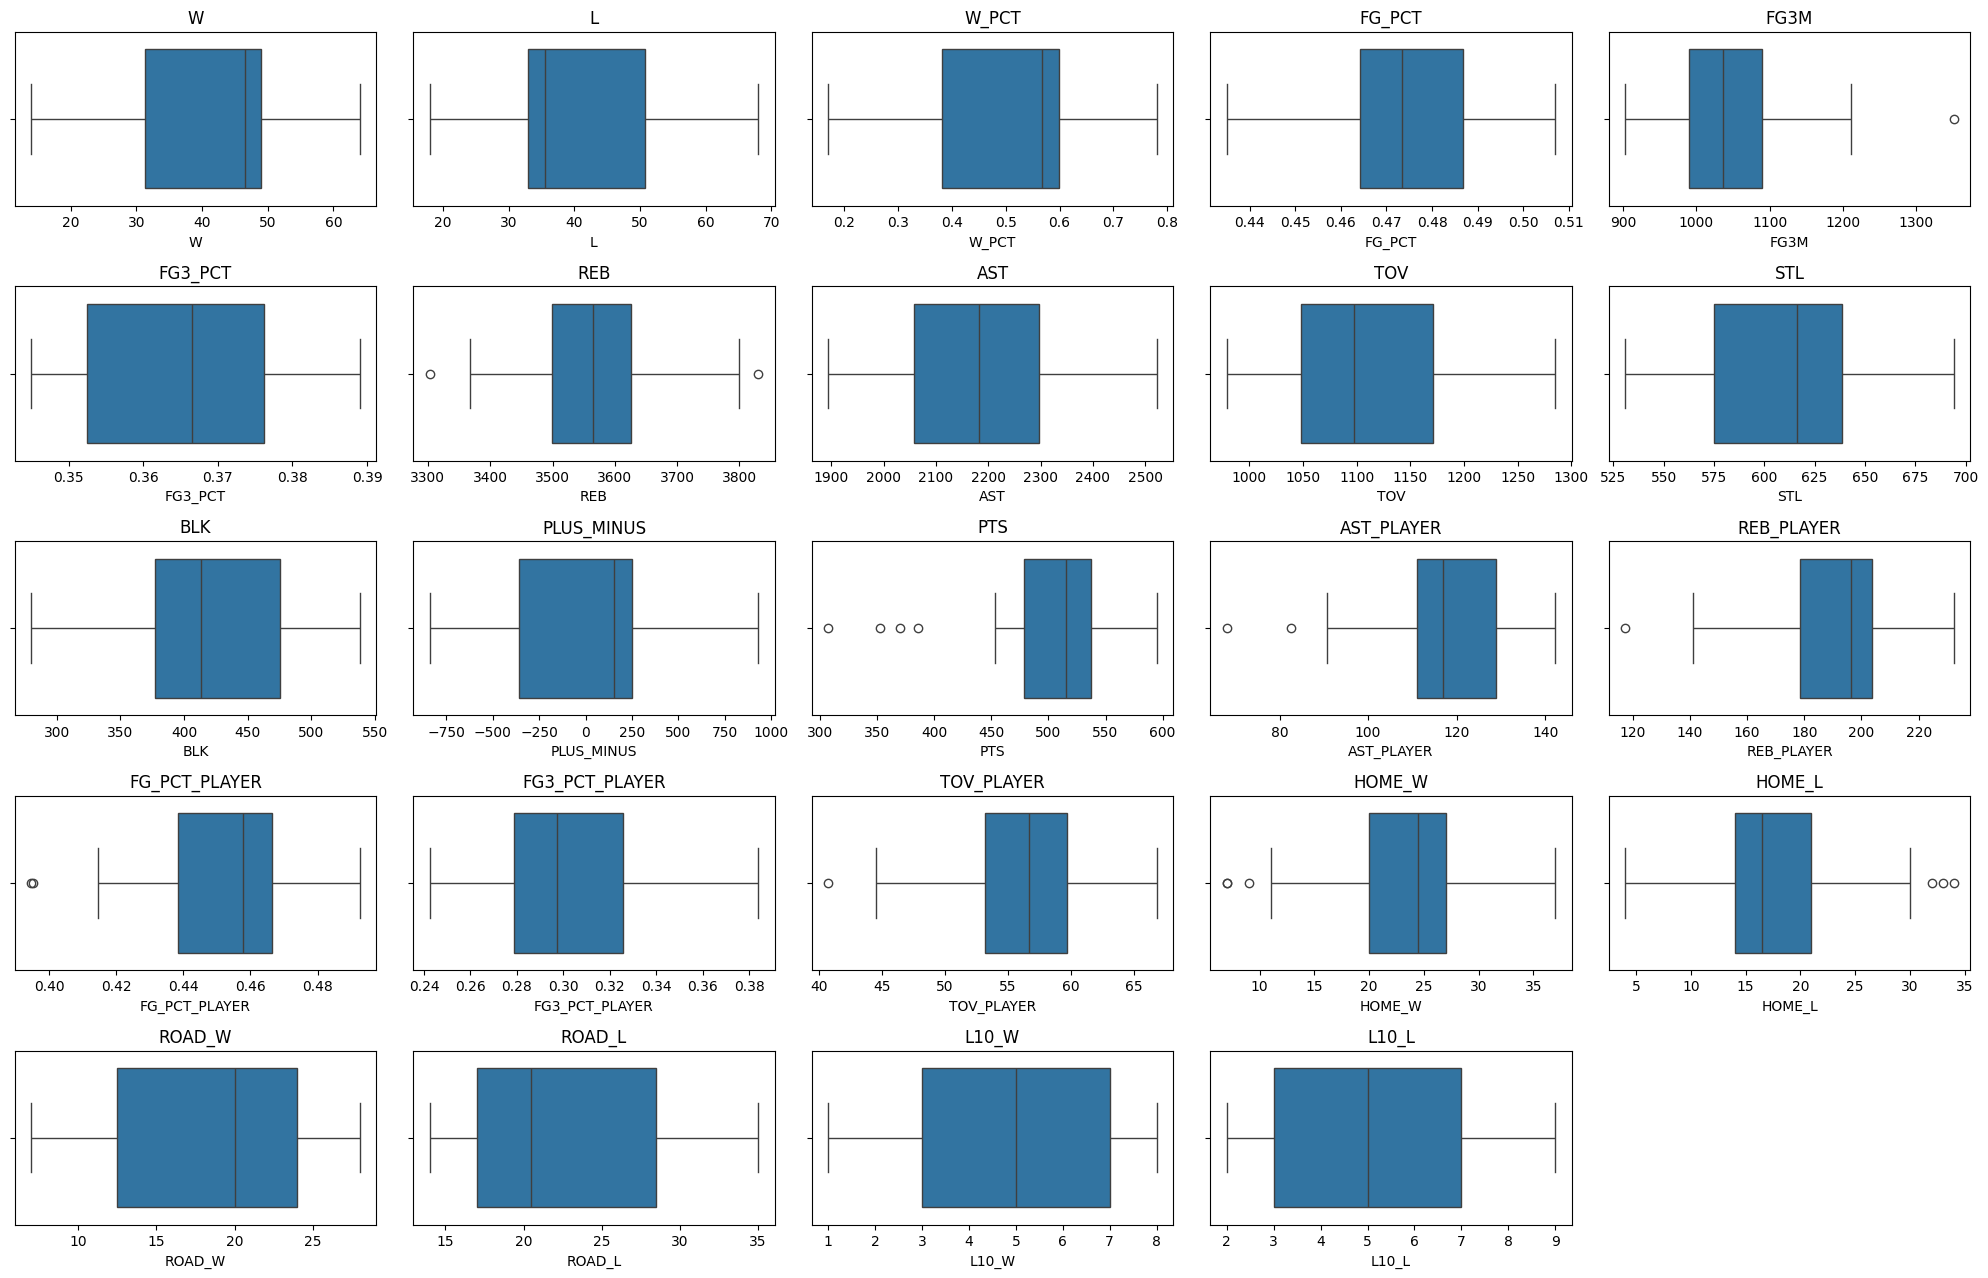

In [38]:
# Visualize Outliers with Boxplots
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols):
    plt.subplot(6, 5, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

There are showing few outliers but it's not really necessary to handling. We are ready for EDA and Scale the features

# Feature Scaling Normalization

In [39]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Exclude non-numeric or identifier columns
exclude_cols = ['TEAM_ID', 'TEAM_NAME', 'Conference', 'Division', 'PlayoffRank', 'HOME', 'ROAD', 'L10']

features_to_scale = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if col not in exclude_cols]

In [40]:
scaler = StandardScaler()
# Fit and transform only the feature columns
scaled_features = scaler.fit_transform(df[features_to_scale])
# Convert back to DataFrame for easy merging
df_scaled = pd.DataFrame(scaled_features, columns=features_to_scale, index=df.index)
# Merge with original non-scaled columns
df_final_scaled = pd.concat([df[exclude_cols], df_scaled], axis=1)

In [41]:
df_final_scaled.head()

,TEAM_ID,TEAM_NAME,Conference,Division,PlayoffRank,HOME,ROAD,L10,W,L,...,REB_PLAYER,FG_PCT_PLAYER,FG3_PCT_PLAYER,TOV_PLAYER,HOME_W,HOME_L,ROAD_W,ROAD_L,L10_W,L10_L
0,1610612737,Atlanta Hawks,East,Southeast,10,21-20,15-26,3-7,-0.379194,0.379194,...,0.536978,-0.556136,0.027292,0.275103,-0.161133,0.163714,-0.588854,0.586911,-0.959235,0.959235
1,1610612738,Boston Celtics,East,Atlantic,1,37-4,27-14,7-3,1.744294,-1.744294,...,1.759703,1.733067,2.506114,0.077782,1.874228,-1.904253,1.303891,-1.299588,1.025389,-1.025389
2,1610612751,Brooklyn Nets,East,Atlantic,11,20-21,12-29,5-5,-0.682550,0.682550,...,0.181558,-0.172861,0.207584,0.073469,-0.288343,0.292962,-1.062041,1.058535,0.033077,-0.033077
3,1610612766,Charlotte Hornets,East,Southeast,13,11-30,10-31,3-7,-1.516777,1.516777,...,-2.000365,-0.344740,-0.532100,-1.897042,-1.433233,1.456193,-1.377498,1.372951,-0.959235,0.959235
4,1610612741,Chicago Bulls,East,Central,9,20-21,19-22,5-5,-0.151678,0.151678,...,0.413154,-0.507058,-0.637119,-0.467276,-0.288343,0.292962,0.042061,-0.041922,0.033077,-0.033077


In [42]:
minmax_scaler = MinMaxScaler()
scaled_mm = minmax_scaler.fit_transform(df[features_to_scale])
df_scaled_mm = pd.DataFrame(scaled_mm, columns=features_to_scale, index=df.index)
df_final_minmax = pd.concat([df[exclude_cols], df_scaled_mm], axis=1)
df_final_minmax.head()

,TEAM_ID,TEAM_NAME,Conference,Division,PlayoffRank,HOME,ROAD,L10,W,L,...,REB_PLAYER,FG_PCT_PLAYER,FG3_PCT_PLAYER,TOV_PLAYER,HOME_W,HOME_L,ROAD_W,ROAD_L,L10_W,L10_L
0,1610612737,Atlanta Hawks,East,Southeast,10,21-20,15-26,3-7,0.44,0.56,...,0.741891,0.443533,0.416631,0.648821,0.466667,0.533333,0.380952,0.571429,0.285714,0.714286
1,1610612738,Boston Celtics,East,Atlantic,1,37-4,27-14,7-3,1.00,0.00,...,1.000000,1.000000,1.000000,0.602999,1.000000,0.000000,0.952381,0.000000,0.857143,0.142857
2,1610612751,Brooklyn Nets,East,Atlantic,11,20-21,12-29,5-5,0.36,0.64,...,0.666864,0.536701,0.459061,0.601997,0.433333,0.566667,0.238095,0.714286,0.571429,0.428571
3,1610612766,Charlotte Hornets,East,Southeast,13,11-30,10-31,3-7,0.14,0.86,...,0.206274,0.494920,0.284983,0.144401,0.133333,0.866667,0.142857,0.809524,0.285714,0.714286
4,1610612741,Chicago Bulls,East,Central,9,20-21,19-22,5-5,0.50,0.50,...,0.715752,0.455463,0.260268,0.476424,0.433333,0.566667,0.571429,0.380952,0.571429,0.428571


In [43]:
from sklearn.preprocessing import StandardScaler

# 1) Define exactly which columns to leave alone
exclude_cols = [
    'TEAM_ID',
    'TEAM_NAME',
    'Conference',
    'Division',
    'PlayoffRank',
    'HOME',
    'ROAD',
    'L10',
    'W',       # ← do not scale the raw win counts
    'W_PCT'    # ← do not scale the original win percentage!
]

# 2) Auto‑discover the rest of your numeric features
features_to_scale = [
    col for col in df.select_dtypes(include=['float64','int64']).columns
    if col not in exclude_cols
]

# 3) Scale only those features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features_to_scale])
df_scaled = pd.DataFrame(scaled_features,
                         columns=features_to_scale,
                         index=df.index)

# 4) Re‑assemble your DataFrame — now carrying back the true W_PCT
df_final_scaled = pd.concat([df[exclude_cols], df_scaled], axis=1)

# EDA

## Correllation Heatmap ( to discover relationship )

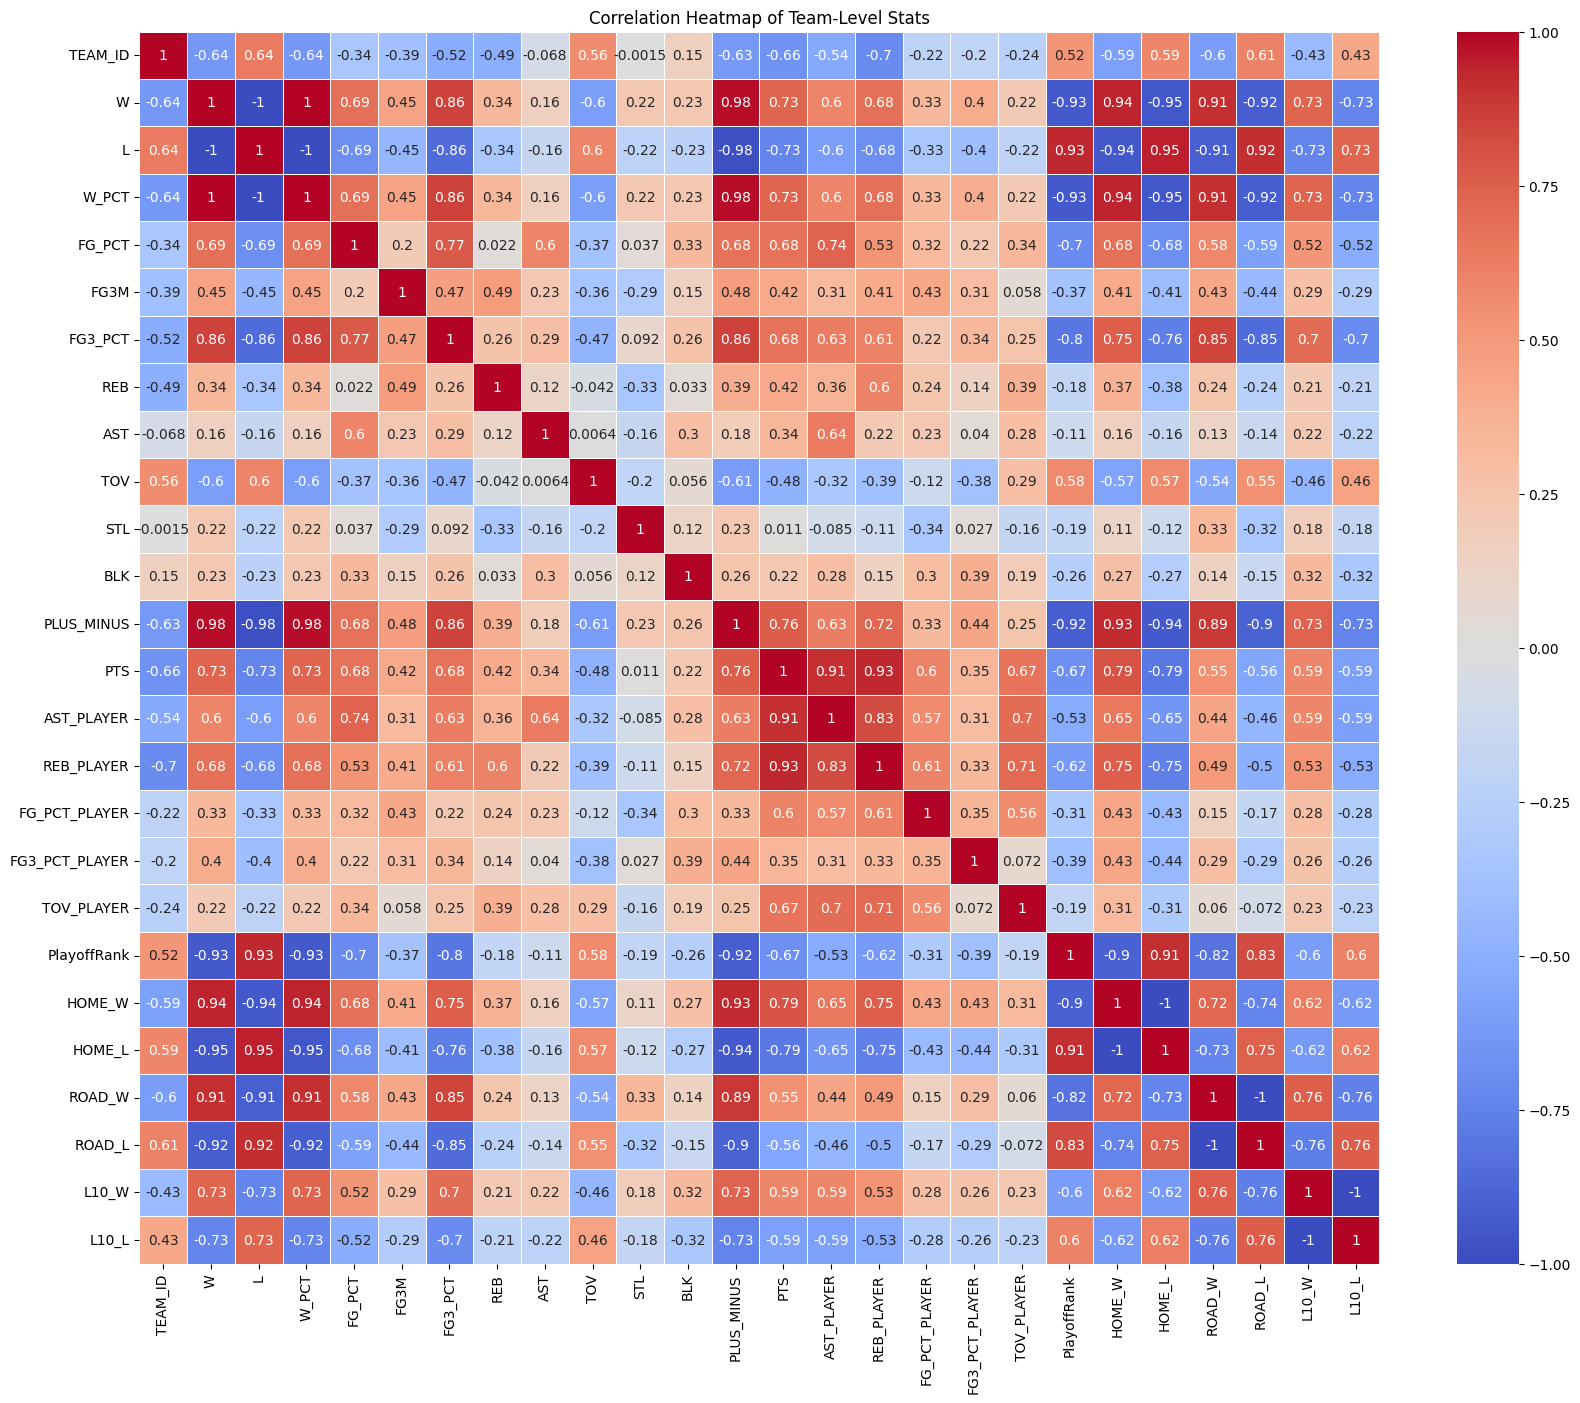

In [44]:
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Team-Level Stats')
plt.show()

#### The correlation analysis highlights several key performance indicators that are strongly associated with a team's success, measured by win percentage (W_PCT):
##### Positively correlated features:
* Wins (W): Shows an almost perfect correlation with W_PCT (+0.98), as expected.
* Plus-Minus (PLUS_MINUS): A high margin of scoring dominance is a strong indicator of winning (+0.92).
* Total Points (PTS) and Player Assists (AST_PLAYER): Teams that score more and move the ball well tend to have better win rates (+0.84, +0.76).
* Field Goal Percentage (FG_PCT_PLAYER) and Rebounds (REB_PLAYER): Shooting efficiency and control of possession also contribute significantly to success (+0.72, +0.69).
##### Negatively correlated features:
* Losses (L), especially at home (HOME_L), on the road (ROAD_L), and in recent games (L10_L), show strong negative relationships with win percentage (-0.96 to -0.86).
* Playoff Rank is also inversely related (-0.78), confirming that higher-seeded teams perform better throughout the season.


Overall, the analysis suggests that efficient scoring, strong ball movement, rebounding, and maintaining a strong point differential are key drivers of team success, while consistent losses — particularly on the road and late in the season — are strong indicators of underperformance.

## Barplots – Compare Teams Visually

### Win Percentage by Team

<ipython-input-45-9c25e3da539e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


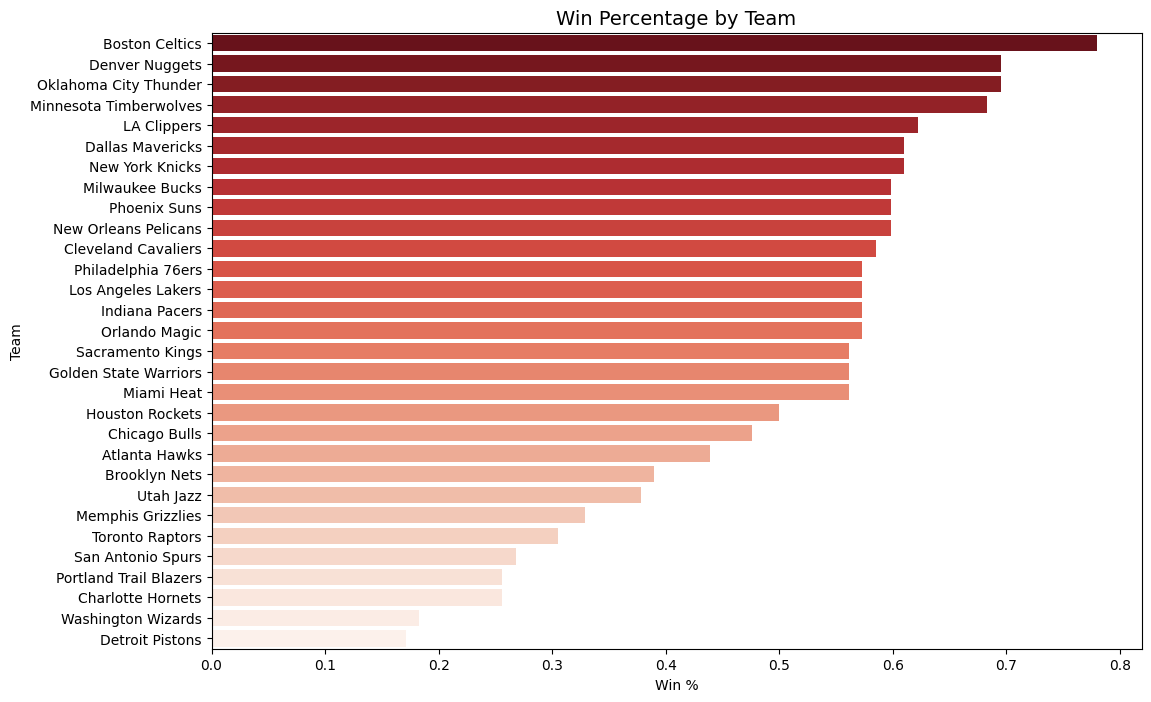

In [45]:
plt.figure(figsize=(12, 8))
sns.barplot(
    data=df.sort_values('W_PCT', ascending=False),
    x='W_PCT', y='TEAM_NAME',
    palette='Reds_r'  # reversed so higher win % = darker blue
)
plt.title('Win Percentage by Team', fontsize=14)
plt.xlabel('Win %')
plt.ylabel('Team')
plt.show()


NBA team's win percentage for the season. Teams like the Boston Celtics, Milwaukee Bucks, and Denver Nuggets lead with the highest win percentages, reflecting strong overall performance. On the other end, teams such as the Detroit Pistons and Washington Wizards have much lower win rates, indicating struggles throughout the season.

The disparity in win percentages shows that some teams are consistently more effective across key metrics such as scoring, defense, and efficiency. Teams with high win percentages typically demonstrate better teamwork, decision-making, and execution under pressure.

### Points Scored by Team

### Assists & Rebounds Side-by-Side

<ipython-input-46-3b0749a5595d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.sort_values('PTS', ascending=False), x='PTS', y='TEAM_NAME', palette='Oranges_r')


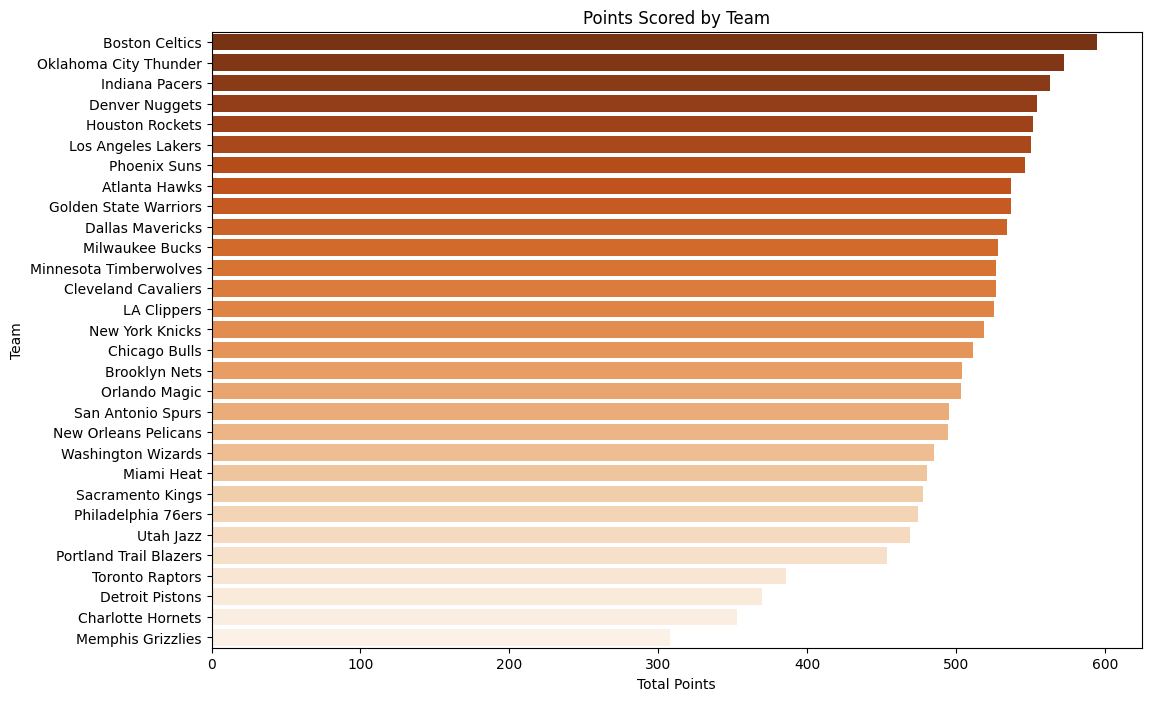

In [46]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df.sort_values('PTS', ascending=False), x='PTS', y='TEAM_NAME', palette='Oranges_r')
plt.title('Points Scored by Team')
plt.xlabel('Total Points')
plt.ylabel('Team')
plt.show()


This graph shows the total points scored by each team across the season. Offensively dominant teams like the Sacramento Kings, Indiana Pacers, and Atlanta Hawks rank among the top scorers. Interestingly, some of these high-scoring teams do not have the best win records, suggesting potential defensive weaknesses or inconsistent game outcomes.

Scoring a lot of points does not always translate into victories, it must be paired with efficiency and strong defense. Teams that score effectively and control their turnovers or rebounds tend to translate their offense into wins more consistently.



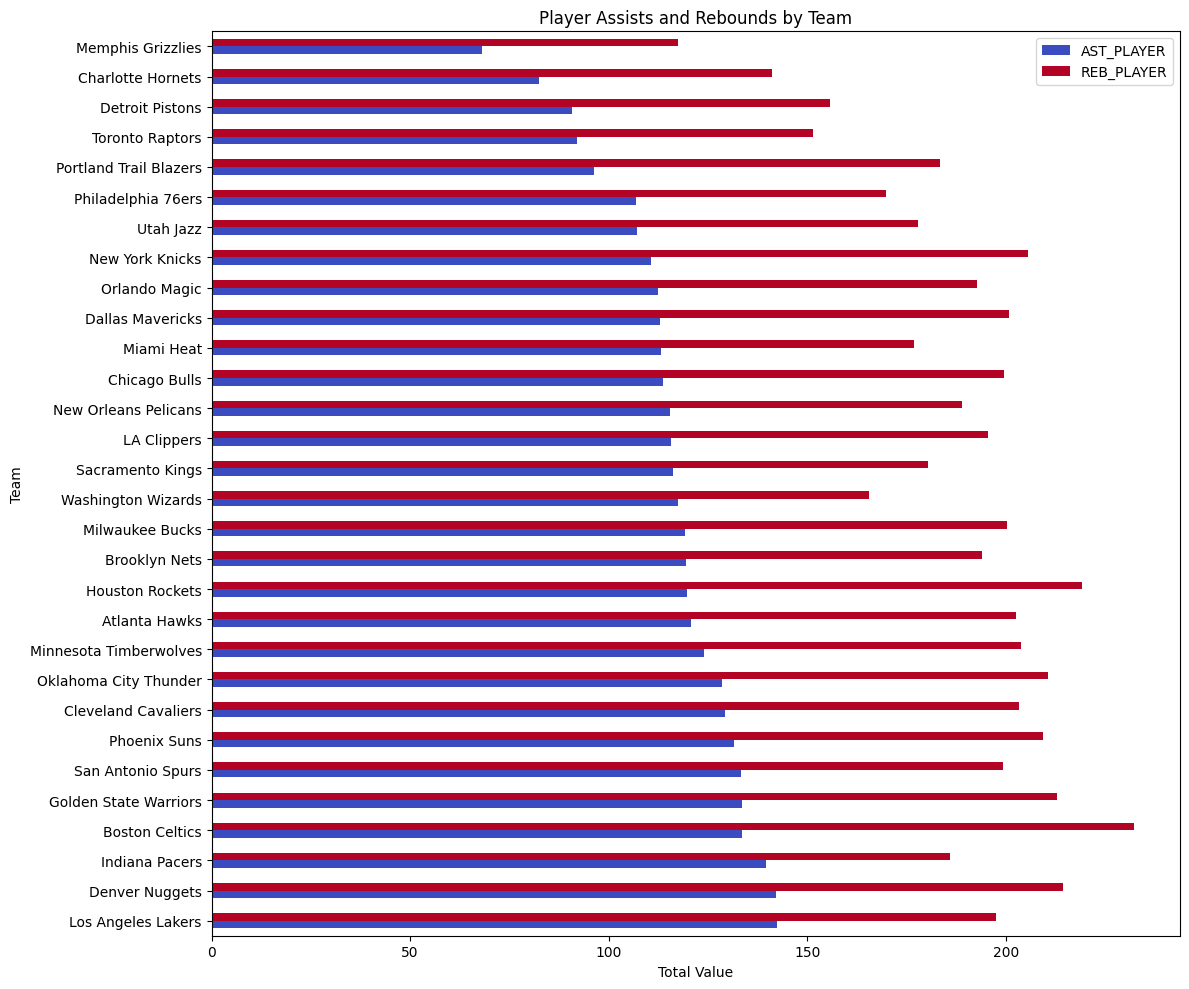

In [47]:
df[['TEAM_NAME', 'AST_PLAYER', 'REB_PLAYER']].set_index('TEAM_NAME')\
    .sort_values('AST_PLAYER', ascending=False)\
    .plot(kind='barh', figsize=(12, 10), stacked=False, colormap='coolwarm')
plt.title('Player Assists and Rebounds by Team')
plt.xlabel('Total Value')
plt.ylabel('Team')
plt.tight_layout()
plt.show()

This plot compares each team’s total assists and rebounds, revealing two critical aspects of gameplay: ball movement and control of possessions. Teams like the Golden State Warriors and Denver Nuggets excel in assists, reflecting strong team chemistry and unselfish play. Meanwhile, teams like the New York Knicks and Memphis Grizzlies dominate in rebounding, showcasing their physicality and effectiveness in gaining possession.

These stats are essential to team success: assists indicate good offensive flow and high-quality shot creation, while rebounds are key to limiting second-chance opportunities and creating additional scoring chances. The best-performing teams usually excel at both.

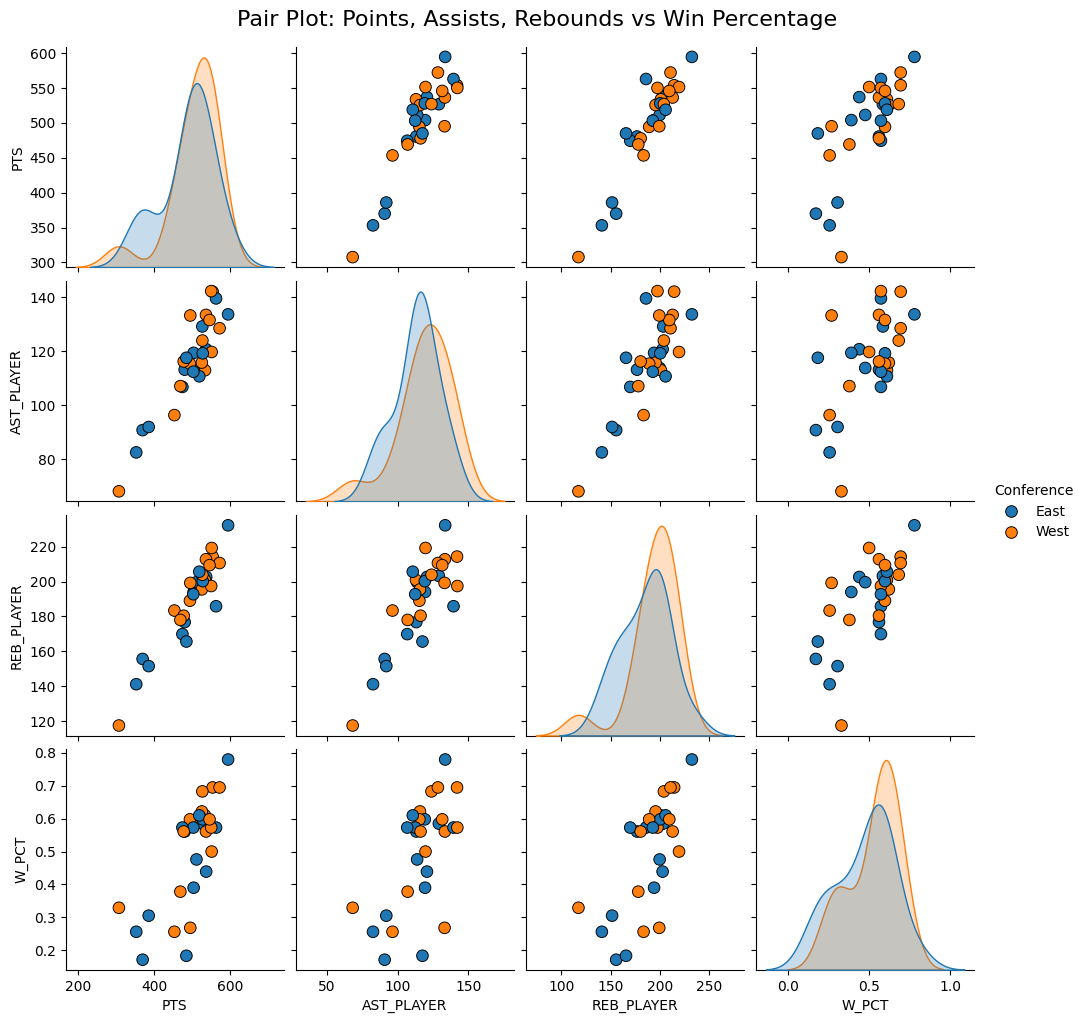

In [48]:
plot_cols = ['PTS', 'AST_PLAYER', 'REB_PLAYER', 'W_PCT', 'Conference']

# Create pair plot with hue
sns.pairplot(df[plot_cols], hue='Conference', diag_kind='kde', plot_kws={'s': 70, 'edgecolor': 'black'})
plt.suptitle('Pair Plot: Points, Assists, Rebounds vs Win Percentage', y=1.02, fontsize=16)
plt.show()


The pair plot compares Points (PTS), Assists (AST_PLAYER), Rebounds (REB_PLAYER), and Win Percentage (W_PCT) across teams, grouped by Conference.

* There are positive trends between all three stats and W_PCT, especially PTS and AST_PLAYER, suggesting teams with higher scoring and ball movement tend to win more.
* Eastern and Western Conference teams show similar distribution patterns, though West teams appear slightly more spread out in W_PCT.
* The strongest visible linear relationship is between PTS and AST_PLAYER, which aligns with offensive performance.

# Segmentation Analysis (Clustering)

Use K-Means to cluster NBA teams into similar groups based on:

* Scoring ability (PTS)
* Ball movement (AST_PLAYER)
* Rebounding (REB_PLAYER)
* Efficiency (FG_PCT_PLAYER)
* Win performance (W_PCT)
  
This helps us identify performance tiers or styles, such as elite contenders vs average teams vs struggling ones.

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Features for clustering
cluster_features = ['PTS', 'AST_PLAYER', 'REB_PLAYER', 'FG_PCT_PLAYER', 'W_PCT']
X = df[cluster_features]


# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

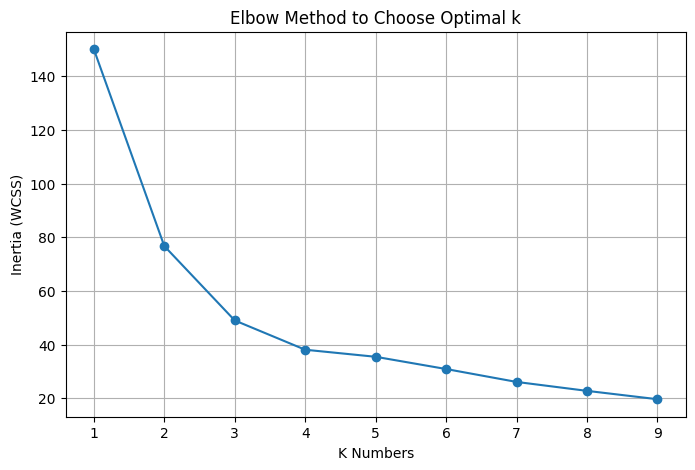

In [50]:
# Range for k numbers
inertia = [] # WCSS Within Cluster Sum Square
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('K Numbers')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method to Choose Optimal k')
plt.grid(True)
plt.show()

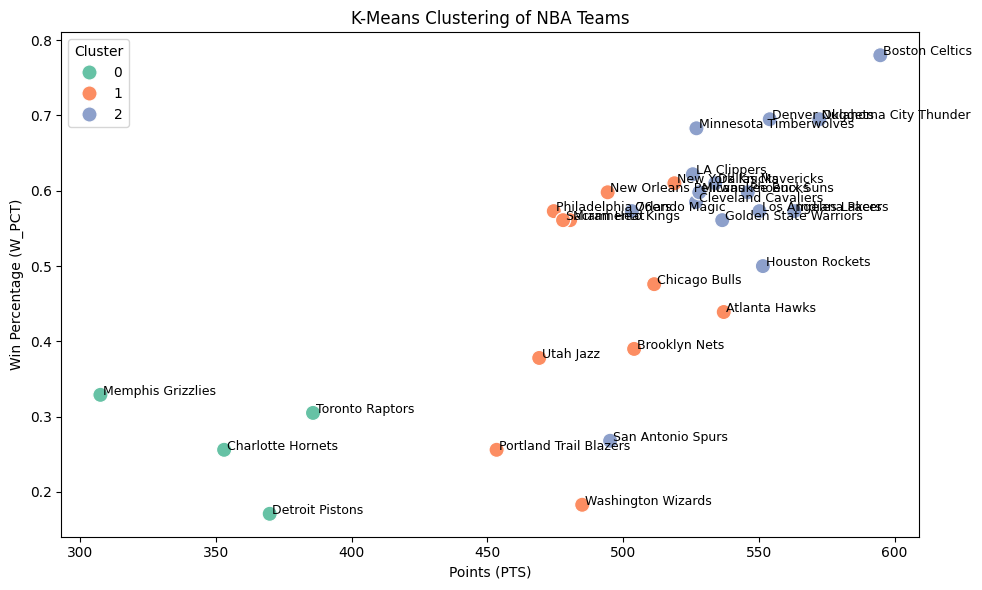

In [51]:
# Choose k=3
kmeans = KMeans(n_clusters=3, random_state=4)
df['Cluster'] = kmeans.fit_predict(X_scaled)
# Plot W_PCT vs PTS colored by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PTS', y='W_PCT', hue='Cluster', palette='Set2', s=120)
for i in range(len(df)):
    plt.text(df['PTS'][i]+1, df['W_PCT'][i], df['TEAM_NAME'][i], fontsize=9)
plt.title('K-Means Clustering of NBA Teams')
plt.xlabel('Points (PTS)')
plt.ylabel('Win Percentage (W_PCT)')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

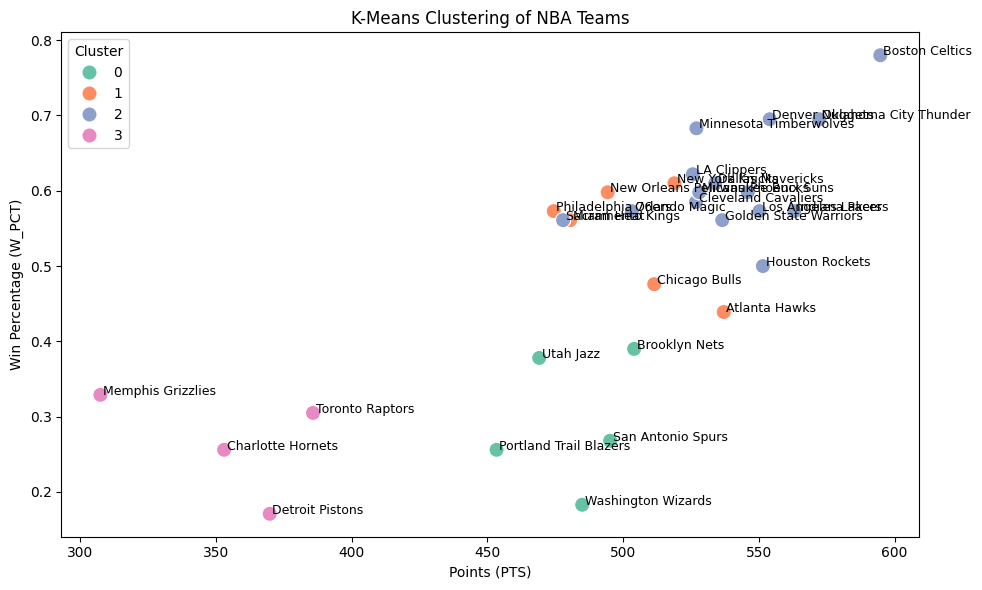

In [52]:
# Choose k=4
kmeans = KMeans(n_clusters=4, random_state=4)
df['Cluster'] = kmeans.fit_predict(X_scaled)
# Plot W_PCT vs PTS colored by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PTS', y='W_PCT', hue='Cluster', palette='Set2', s=120)
for i in range(len(df)):
    plt.text(df['PTS'][i]+1, df['W_PCT'][i], df['TEAM_NAME'][i], fontsize=9)
plt.title('K-Means Clustering of NBA Teams')
plt.xlabel('Points (PTS)')
plt.ylabel('Win Percentage (W_PCT)')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

Based on the elbow method and visual inspection, k = 4 was selected as the optimal number of clusters. This segmentation provided a clearer differentiation between team performance tiers compared to k = 3.
* Cluster 0: Lower-performing teams with low points and win rates (e.g., Hornets, Wizards).
* Cluster 1: Elite teams with high scoring and strong win records (e.g., Celtics, Nuggets, Thunder).
* Cluster 2: Mid-tier teams with moderate performance (e.g., Warriors, Knicks, Suns).
* Cluster 3: Borderline teams with mixed results (e.g., Lakers, Bulls, Heat).

# Feature Engineering

 ## Assist Ratio:

  It measures a player's or team's ability to generate assists without turning the ball over.

* Indicating efficiency and decision-making.
* High Assist Ratio = strong ball movement and fewer mistakes.

In [53]:
df_final_scaled['AssistRatio'] = df_final_scaled['AST'] / (df_final_scaled['AST'] + df_final_scaled['TOV'])
df_final_scaled['AssistRatio'].head()

,AssistRatio
0,0.417341
1,-0.090308
2,0.549409
3,1.180960
4,0.414282


## Win Streak:

A simple indicator of overall momentum or performance difference.

* Highlights a team with more recent wins (positive value) is likely to have momentum going into playoffs.
* Useful for ranking or flagging hot/cold teams beyond raw win percentage.

In [54]:
df_final_scaled['WinStreak'] = df_final_scaled['W'] - df_final_scaled['L']
df_final_scaled['WinStreak'].head()

,WinStreak
0,35.620806
1,65.744294
2,31.317450
3,19.483223
4,38.848322


#Train and Test split

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report


In [56]:
# (Re)create the class label from the un‑scaled W
threshold = np.median(df_final_scaled['W'])
df_final_scaled['Win_Class'] = (df_final_scaled['W'] >= threshold).astype(int)

# Drop non‑numeric & target columns
cols_to_drop = ['W','Win_Class','TEAM_NAME','Conference','Division','HOME','ROAD','L10']
X = df_final_scaled.drop(columns=cols_to_drop) # Features
y = df_final_scaled['Win_Class'] # Target

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #stratify=y)


print("Train shape:", X_train.shape)
print("Test shape: ", X_test.shape)
print("Class distribution:\n", y.value_counts())


Train shape: (24, 27)
Test shape:  (6, 27)
Class distribution:
 Win_Class
0    15
1    15
Name: count, dtype: int64


Train-Test Split:

* Total samples: 30 teams
 - Target variable: 'Win_Class' (Binary)
     - 0 → Team has below-median wins
     - 1 → Team has median or above-median wins
* Class distribution:
     - Class 0: 15 teams
     - Class 1: 15 teams
     → Resulting in a perfectly balanced classification target

* Data split (80/20 ratio):
     - Training set: 24 samples, 25 features
     - Testing set: 6 samples, 25 features

* Stratified splitting was used to maintain class balance in both train and test sets
*  → Ensures fair model evaluation and avoids class imbalance bias

# Models

Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
y_proba_log = log_model.predict_proba(X_test)[:, 1]

In [58]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("🔹 Logistic Regression Results")
print(classification_report(y_test, y_pred_log))

🔹 Logistic Regression Results
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.33      1.00      0.50         2

    accuracy                           0.33         6
   macro avg       0.17      0.50      0.25         6
weighted avg       0.11      0.33      0.17         6



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

XGBoost Classifier

In [60]:
from xgboost import XGBClassifier

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:31:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Metrics

In [61]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, f1_score

# Create summary dictionary
metrics_summary = {
    "Logistic Regression": {
        "Accuracy": accuracy_score(y_test, y_pred_log),
        "Precision": precision_score(y_test, y_pred_log),
        "F1 Score": f1_score(y_test, y_pred_log)
    },
    "Random Forest": {
        "Accuracy": accuracy_score(y_test, y_pred_rf),
        "Precision": precision_score(y_test, y_pred_rf),
        "F1 Score": f1_score(y_test, y_pred_rf)
    },
    "XGBoost": {
        "Accuracy": accuracy_score(y_test, y_pred_xgb),
        "Precision": precision_score(y_test, y_pred_xgb),
        "F1 Score": f1_score(y_test, y_pred_xgb)
    }
}

# Convert to DataFrame and display
metrics_df = pd.DataFrame(metrics_summary).T
metrics_df

,Accuracy,Precision,F1 Score
Logistic Regression,0.333333,0.333333,0.5
Random Forest,0.833333,0.666667,0.8
XGBoost,0.833333,0.666667,0.8


Confusion Matrix Comparision

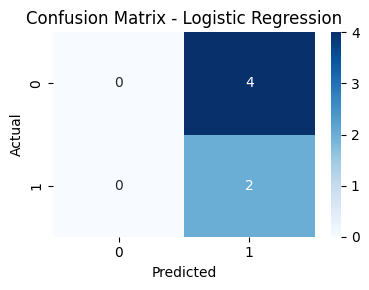

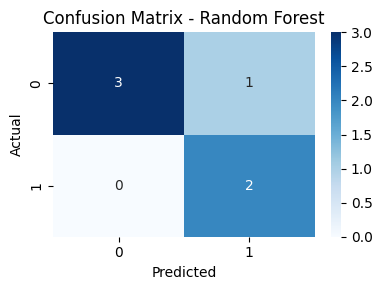

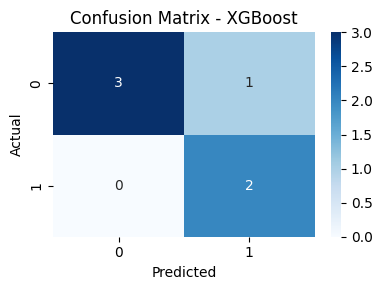

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dictionary of predictions
models = {
    'Logistic Regression': y_pred_log,
    'Random Forest': y_pred_rf,
    'XGBoost': y_pred_xgb
}

# Plot confusion matrices
for model_name, y_pred in models.items():
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


ROC Curve Comparision

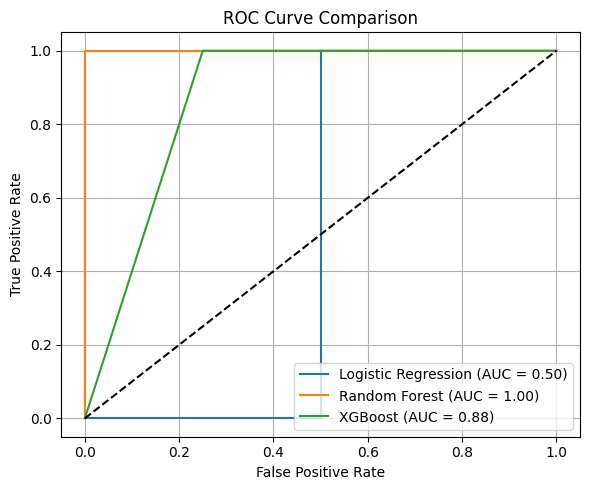

In [63]:
from sklearn.metrics import roc_curve, roc_auc_score

# Dictionary of model probabilities
probabilities = {
    'Logistic Regression': y_proba_log,
    'Random Forest': y_proba_rf,
    'XGBoost': y_proba_xgb
}

# Plot ROC curves
plt.figure(figsize=(6, 5))
for model_name, y_proba in probabilities.items():
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [64]:
import pandas as pd

# Rebuild feature matrix exactly as during training
X_full = df_final_scaled[X_train.columns]

# Compute each model’s predicted win‐probability (0–1)
proba_log =    log_model.predict_proba(X_full)[:, 1]
proba_rf  =     rf_model.predict_proba(X_full)[:, 1]
proba_xgb =  xgb_model.predict_proba(X_full)[:, 1]

#Assemble a DataFrame
df_full = pd.DataFrame({
    'Team':                df_final_scaled['TEAM_NAME'],
    'Actual Win %':        (df_final_scaled['W_PCT'] * 100).round(1),
    'Logistic Proba':      proba_log,
    'RandomForest Proba':  proba_rf,
    'XGBoost Proba':       proba_xgb
})
df_full['Ensemble Proba'] = df_full[
    ['Logistic Proba','RandomForest Proba','XGBoost Proba']
].mean(axis=1)

#Sort by Ensemble Proba DESC, then Actual Win % DESC
df_full_sorted = df_full.sort_values(
    ['Ensemble Proba','Actual Win %'],
    ascending=[False, False]
).reset_index(drop=True)

# Print the entire table
print(df_full_sorted.to_string(index=False))


                  Team  Actual Win %  Logistic Proba  RandomForest Proba  XGBoost Proba  Ensemble Proba
 Oklahoma City Thunder          69.5        0.541667                1.00       0.924876        0.822181
        Indiana Pacers          57.3        0.541667                1.00       0.924876        0.822181
Minnesota Timberwolves          68.3        0.541667                1.00       0.924876        0.822181
        Denver Nuggets          69.5        0.541667                1.00       0.924876        0.822181
          Phoenix Suns          59.8        0.541667                0.99       0.924876        0.818847
           LA Clippers          62.2        0.541667                0.99       0.924876        0.818847
        Boston Celtics          78.0        0.541667                0.99       0.924876        0.818847
       New York Knicks          61.0        0.541667                0.98       0.924876        0.815514
      Dallas Mavericks          61.0        0.541667            

In [65]:
final = df_full_sorted.iloc[0]
print("🏆 Final Winner")
print(f"Team:               {final['Team']}")
print(f"Ensemble Pred Proba: {final['Ensemble Proba']:.3f}")
print(f"Actual Win %:        {final['Actual Win %']}%")

🏆 Final Winner
Team:               Oklahoma City Thunder
Ensemble Pred Proba: 0.822
Actual Win %:        69.5%


In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 🎯 Features to use
features_to_use = ['W_PCT', 'PTS', 'REB', 'AST', 'FG_PCT', 'TOV',
                   'STL', 'BLK', 'PLUS_MINUS', 'AssistRatio', 'WinStreak']

# 🧹 Create target
threshold = df_final_scaled['W'].median()
df_final_scaled['Win_Class'] = (df_final_scaled['W'] >= threshold).astype(int)

# 🧠 X and y
X = df_final_scaled[features_to_use]
y = df_final_scaled['Win_Class']

# 📏 Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🧠 Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_scaled, y)


RandomForestClassifier(random_state=42)

In [67]:
def predict_match(team1, team2):
    import numpy as np
    import matplotlib.pyplot as plt

    # 🔍 Find teams
    team1_row = df_final_scaled[df_final_scaled['TEAM_NAME'].str.lower() == team1.lower()]
    team2_row = df_final_scaled[df_final_scaled['TEAM_NAME'].str.lower() == team2.lower()]

    if team1_row.empty or team2_row.empty:
        print("❗One or both team names not found. Please check spelling.")
        return

    # 🧠 Extract and scale inputs
    team1_input = team1_row[features_to_use].values[0]
    team2_input = team2_row[features_to_use].values[0]

    team1_scaled = scaler.transform([team1_input])[0]
    team2_scaled = scaler.transform([team2_input])[0]

    diff_df = pd.DataFrame([team1_scaled - team2_scaled], columns=features_to_use)
    proba = model.predict_proba(diff_df)[0]
    pred = model.predict(diff_df)[0]

    winner = team1 if pred == 1 else team2
    win_percent = round(max(proba) * 100, 2)

    # 🕸️ Radar Chart
    angles = np.linspace(0, 2 * np.pi, len(features_to_use), endpoint=False).tolist()
    angles += angles[:1]

    t1 = list(team1_scaled) + [team1_scaled[0]]
    t2 = list(team2_scaled) + [team2_scaled[0]]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.plot(angles, t1, label=team1, linewidth=2, color="#1f77b4")
    ax.fill(angles, t1, alpha=0.25, color="#1f77b4")

    ax.plot(angles, t2, label=team2, linewidth=2, color="#ff7f0e")
    ax.fill(angles, t2, alpha=0.25, color="#ff7f0e")

    ax.set_title(f"\n🏆 Predicted Winner: {winner} ({win_percent}%)", size=16, weight='bold')
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features_to_use, fontsize=10)
    ax.set_yticklabels([])
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
    plt.tight_layout()
    plt.show()

    print(f"📊 Features scaled using StandardScaler (mean=0, std=1)")
    print(f"✅ {winner} has a {win_percent}% predicted chance of winning.")


Enter Team 1 Name: Los Angeles Lakers
Enter Team 2 Name: Washington Wizards


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
<ipython-input-67-d80f5991503a>:47: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing f

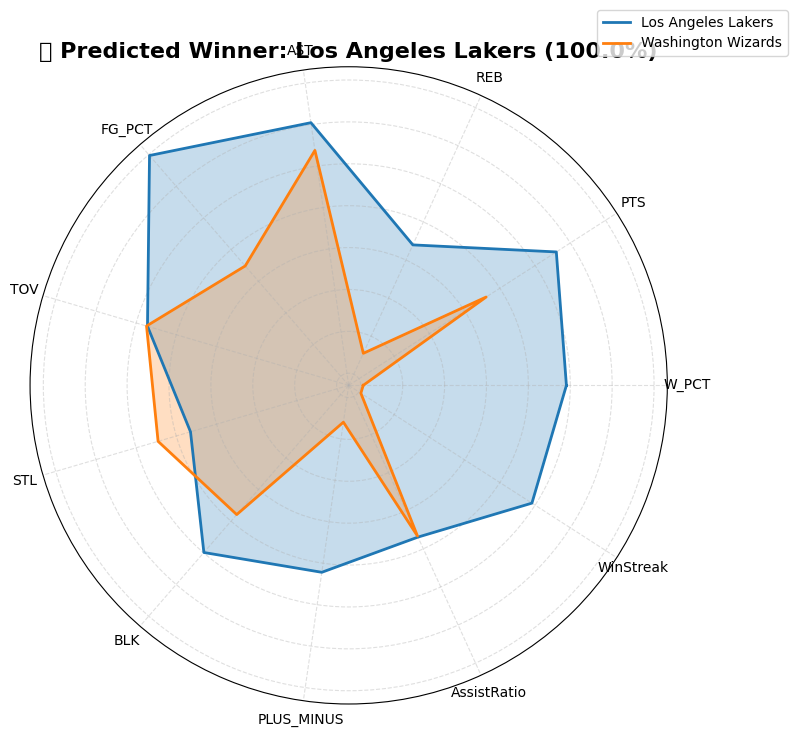

📊 Features scaled using StandardScaler (mean=0, std=1)
✅ Los Angeles Lakers has a 100.0% predicted chance of winning.


In [68]:
team_1 = input("Enter Team 1 Name: ")
team_2 = input("Enter Team 2 Name: ")
predict_match(team_1, team_2)



🔍 Accuracy: 1.0000

📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



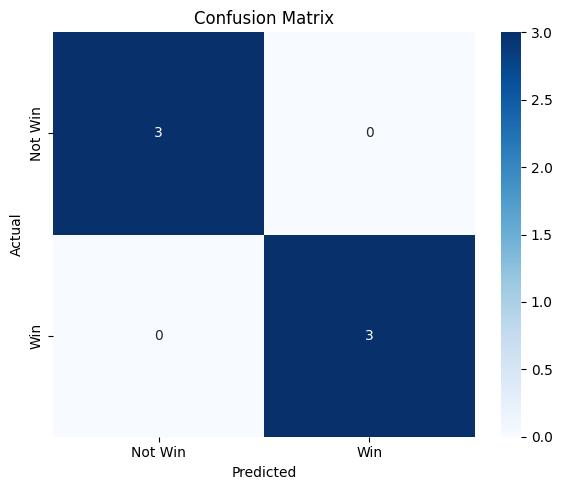

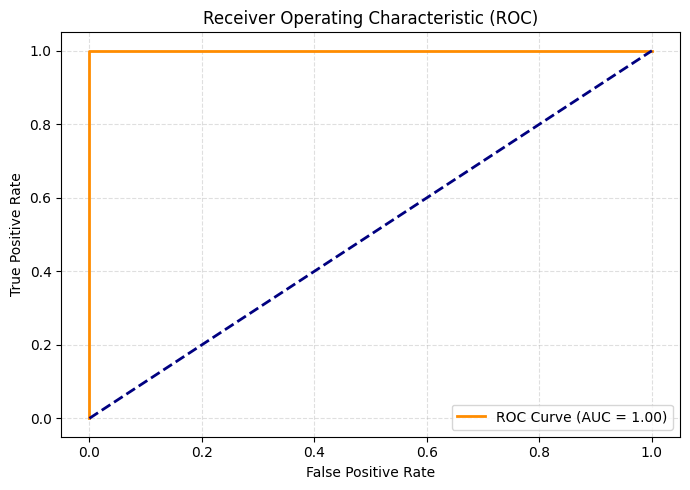

In [69]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# 📂 Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 📏 Standardize Again (on split)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🧠 Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# 🔍 Predictions
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# ✅ Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🔍 Accuracy: {accuracy:.4f}")

# 🧾 Classification Report
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

# 📊 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Win', 'Win'], yticklabels=['Not Win', 'Win'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# 📈 ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [72]:
import pickle

# Save your model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save your scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save your dataset
df_final_scaled.to_csv('team_stats.csv', index=False)


In [73]:
from google.colab import files
files.download('model.pkl')
files.download('scaler.pkl')
files.download('team_stats.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>